In [1]:
from tqdm.notebook import tqdm
import pandas as pd

In [2]:
%config InlineBackend.figure_format='retina'

In [3]:
import numpy as np
from scipy import sparse
from tqdm.notebook import tqdm

In [4]:
from p_tqdm import p_map, p_umap

In [5]:
!ls ../data/processed

A_tr.npz   B_tr.npz  meta_tr.csv   P_tr.npz
A_tst.npz  meta.csv  meta_tst.csv  test.cor


In [6]:
A_tr = sparse.load_npz('../data/processed/A_tr.npz')
B_tr = sparse.load_npz('../data/processed/B_tr.npz')
P_tr = sparse.load_npz('../data/processed/P_tr.npz')
A_tr_csr = A_tr
A_tr_csc = A_tr.tocsc(copy=True)  # memory is cheap ;D

In [7]:
A_tr

<656x1563400 sparse matrix of type '<class 'numpy.int64'>'
	with 7570310 stored elements in Compressed Sparse Row format>

## Sample paths strictly using node2vec

In [8]:
%load_ext autoreload

%autoreload 2

In [9]:
import sys
sys.path.insert(0, '../')

In [10]:
from src.features import n2v
# del n2v
n2v = n2v.Node2Vec(A_tr, B_tr, P_tr)

In [32]:
n2v.perform_one_walk_full()

['app_608',
 'api_8736',
 'app_608',
 'api_8737',
 'api_288',
 'app_138',
 'api_9143',
 'app_219',
 'api_9120',
 'app_392',
 'api_6141',
 'api_6084',
 'api_6141',
 'api_736774',
 'api_6141',
 'app_104',
 'api_4895',
 'api_36434',
 'api_1542108',
 'api_1542122']

In [13]:
# walks = n2v.save_corpus()

In [ ]:
%load_ext line_profiler

In [ ]:
!wc -l node2vec_n=1_p=2_q=1_wl=100.cor

In [16]:
ls -al

total 10685
drwxr-x---  3 yuz530 55451      13 Apr 29 12:43  ./
drwxr-x--- 11 yuz530 55451      18 Apr 23 22:39  ../
-rw-r-----  1 yuz530 55451       0 Apr 12 18:38  .gitkeep
drwxr-xr-x  2 yuz530 root        7 Apr 29 09:38  .ipynb_checkpoints/
-rw-r--r--  1 yuz530 root    12806 Apr 29 12:43  node2vec-Copy1.ipynb
-rw-r--r--  1 yuz530 root    12508 Apr 29 09:56  node2vec-Copy2.ipynb
-rw-r--r--  1 yuz530 root    12813 Apr 29 12:31  node2vec.ipynb
-rw-r--r--  1 yuz530 root  6627716 Apr 29 12:31 'node2vec_n=10_p=1_q=1_wl=100.cor'
-rw-r--r--  1 yuz530 root  6636468 Apr 29 12:42 'node2vec_n=10_p=2_q=1_wl=100.cor'
-rw-r--r--  1 yuz530 root  1329521 Apr 26 18:17 'node2vec_n=1_p=1_q=1_wl=200.cor'
-rw-r--r--  1 yuz530 root  6598696 Apr 29 12:36 'node2vec_n=20_p=2_q=1_wl=50.cor'
-rw-r--r--  1 yuz530 root    41087 Apr 26 17:57  node2vec_StellarGraph.ipynb
-rw-r--r--  1 yuz530 root   175453 Apr 26 21:35  word2vec.ipynb


In [20]:
CORPUS = 'node2vec_n=10_p=1_q=1_wl=100.cor'

In [14]:
CORPUS = 'node2vec_n=10_p=2_q=1_wl=100.cor'

In [15]:
from gensim import utils

class MyCorpus(object):
    """An interator that yields sentences (lists of str)."""

    def __iter__(self):
        corpus_path = CORPUS
        for line in open(corpus_path):
            # assume there's one document per line, tokens separated by whitespace
            yield line.strip().split(' ')

unable to import 'smart_open.gcs', disabling that module


In [16]:
sentences = MyCorpus()

In [17]:
%%time

import gensim.models

sentences = MyCorpus()
model = gensim.models.Word2Vec(sentences=sentences, min_count=1, size=64)

CPU times: user 46.5 s, sys: 871 ms, total: 47.4 s
Wall time: 40.9 s


In [18]:
!ls ../data/processed/

A_tr.npz   B_tr.npz  meta_tr.csv   P_tr.npz
A_tst.npz  meta.csv  meta_tst.csv  test.cor


In [19]:
meta_tr = pd.read_csv('../data/processed/meta_tr.csv', index_col=0)

In [20]:
meta_tr.head()

,label
data/interim/class1/5de94bc0c4cc183c0ee5a48a7ae5ae43,class1
data/interim/class1/4af6f90aa6c27fc15e37396cd53a9e09,class1
data/interim/class0/ctcstudio.it.home,class0
data/interim/class1/f4dbd473d0cc290055f7f3e4f81056fc,class1
data/interim/class0/com.comicc.ads,class0


In [21]:
y_train = meta_tr.label == 'class1'

In [22]:
app_vec = np.array([model.wv[f'app_{i}'] for i in range(len(meta_tr))])

In [23]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

In [24]:
svm.fit(app_vec, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
svm.score(app_vec, y_train)

0.8551829268292683

In [25]:
svm.score(app_vec, y_train)

0.8445121951219512

In [31]:
!head ../data/processed/meta_tr.csv

,label
data/interim/class1/5de94bc0c4cc183c0ee5a48a7ae5ae43,class1
data/interim/class1/4af6f90aa6c27fc15e37396cd53a9e09,class1
data/interim/class0/ctcstudio.it.home,class0
data/interim/class1/f4dbd473d0cc290055f7f3e4f81056fc,class1
data/interim/class0/com.comicc.ads,class0
data/interim/class0/it.sevotec.iSanMarco,class0
data/interim/class1/0adcc06fe300df345a48c49c66801e42,class1
data/interim/class0/com.levosticker,class0
data/interim/class1/6c7dcd3109de11d6ea607e9b43c19ff0,class1


In [30]:
!ls ../data/processed/

A_tr.npz   B_tr.npz  meta_tr.csv   P_tr.npz
A_tst.npz  meta.csv  meta_tst.csv  test.cor


In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    embs = {}

    for word in model.wv.vocab:
        if 'api' in word: continue
        embs[word] = model.wv[word]
    
    tsne_model = TSNE(n_components=2, random_state=0)
    new_values = tsne_model.fit_transform(list(embs.values()))

    token_coor = dict(zip(embs.keys(), new_values))


    plt.figure(figsize=(16, 12))
    cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

    for token, coor in token_coor.items():
        x, y = coor
        label = meta_tr[meta_tr.app_id == token].label.item()
        color = cycle[0] if label == 'class1' else cycle[1]
        plt.scatter(x, y, c=color, alpha=0.8)
# #         plt.annotate(labels[i],
# #                      xy=(x[i], y[i]),
# #                      xytext=(5, 2),
# #                      textcoords='offset points',
# #                      ha='right',
# #                      va='bottom')
    plt.show()

In [28]:
meta_tr['app_id'] = [f'app_{i}' for i in range(meta_tr.shape[0])]

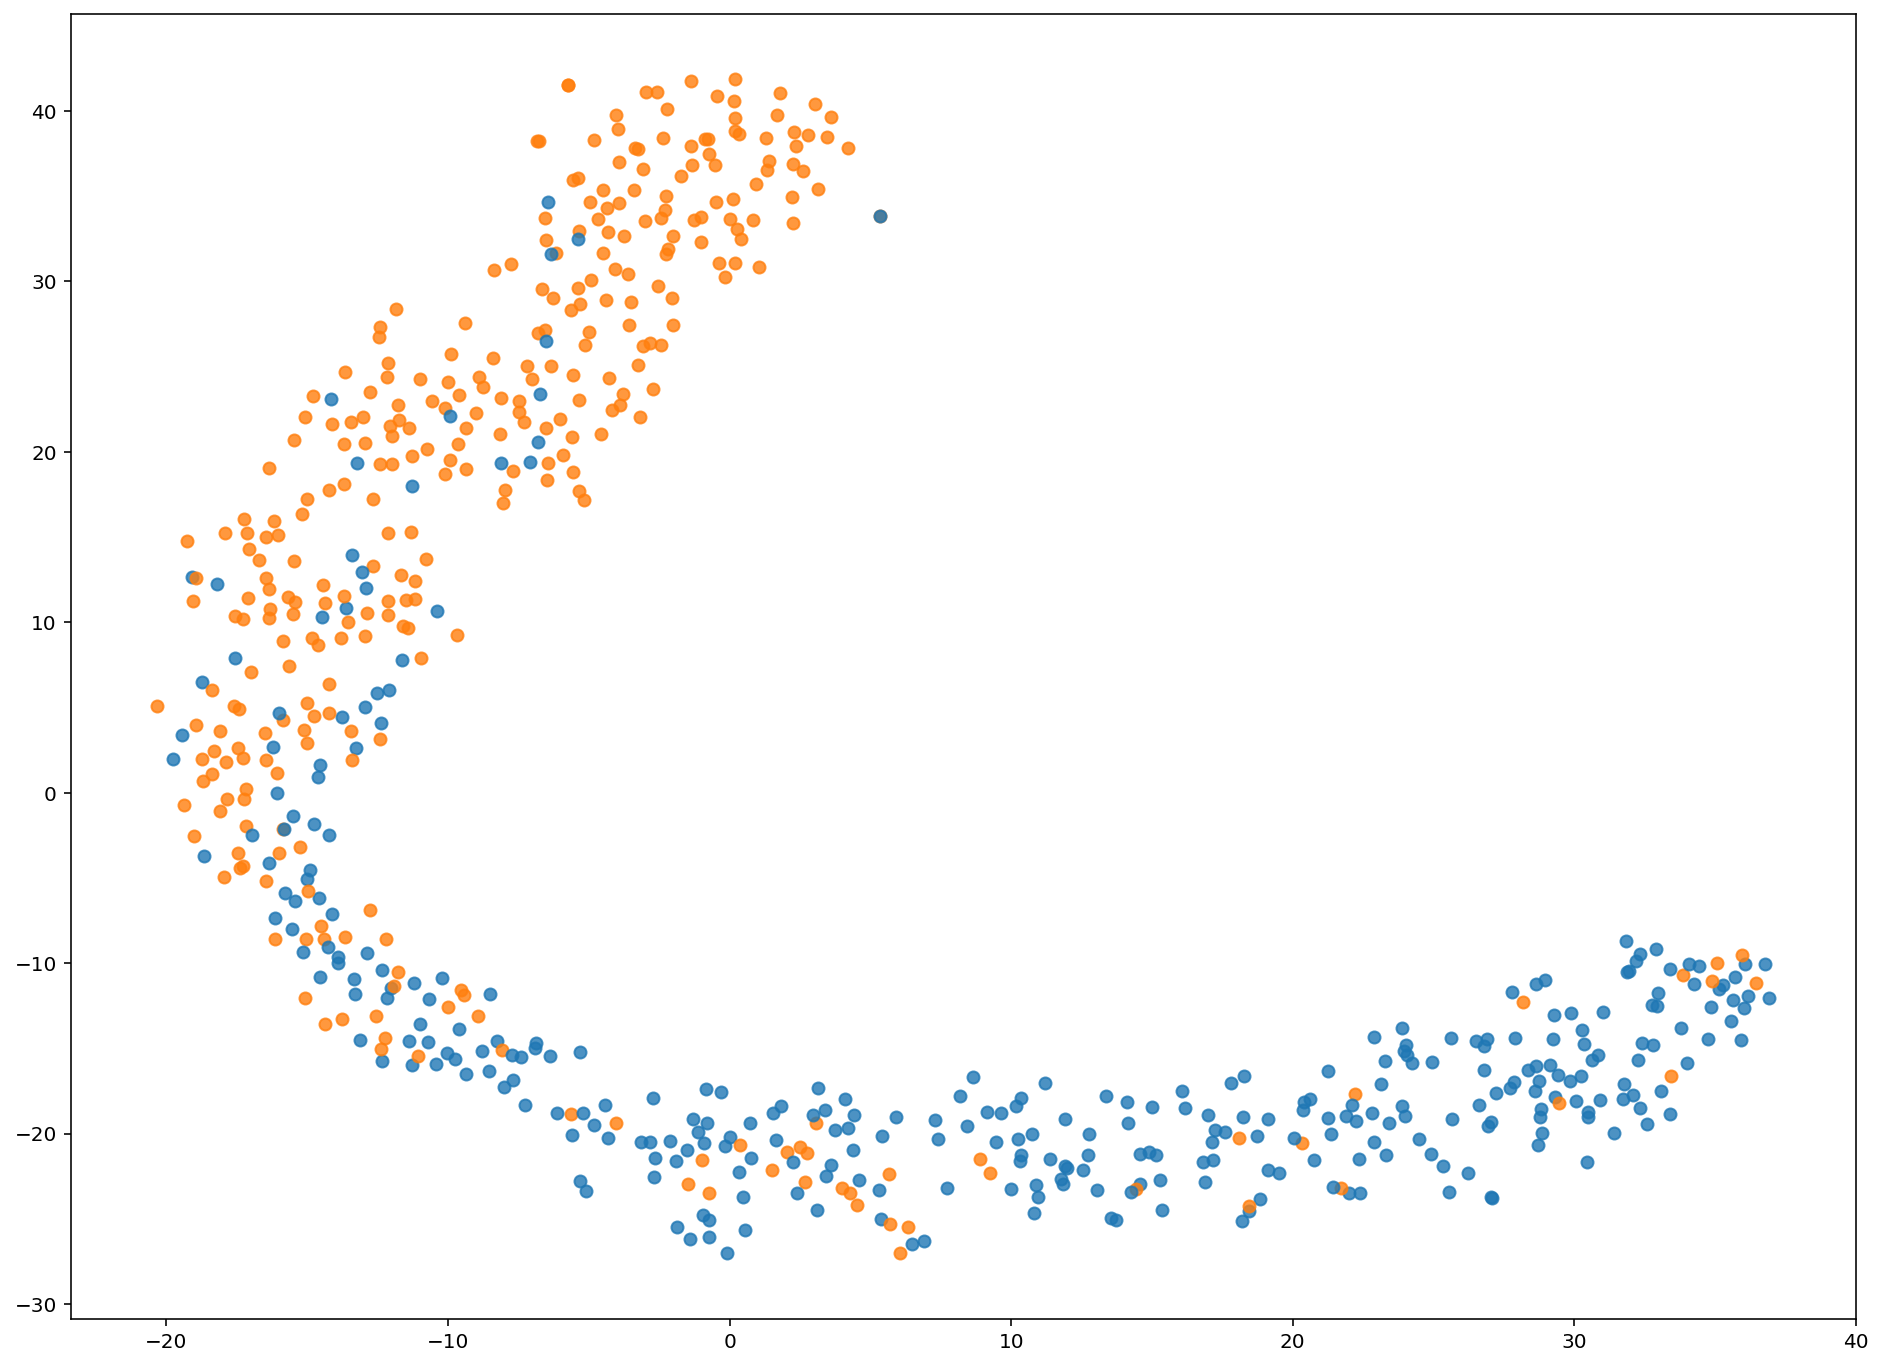

In [91]:
tsne_plot(model)
# node2vec_n=10_p=1_q=1_wl=100.cor

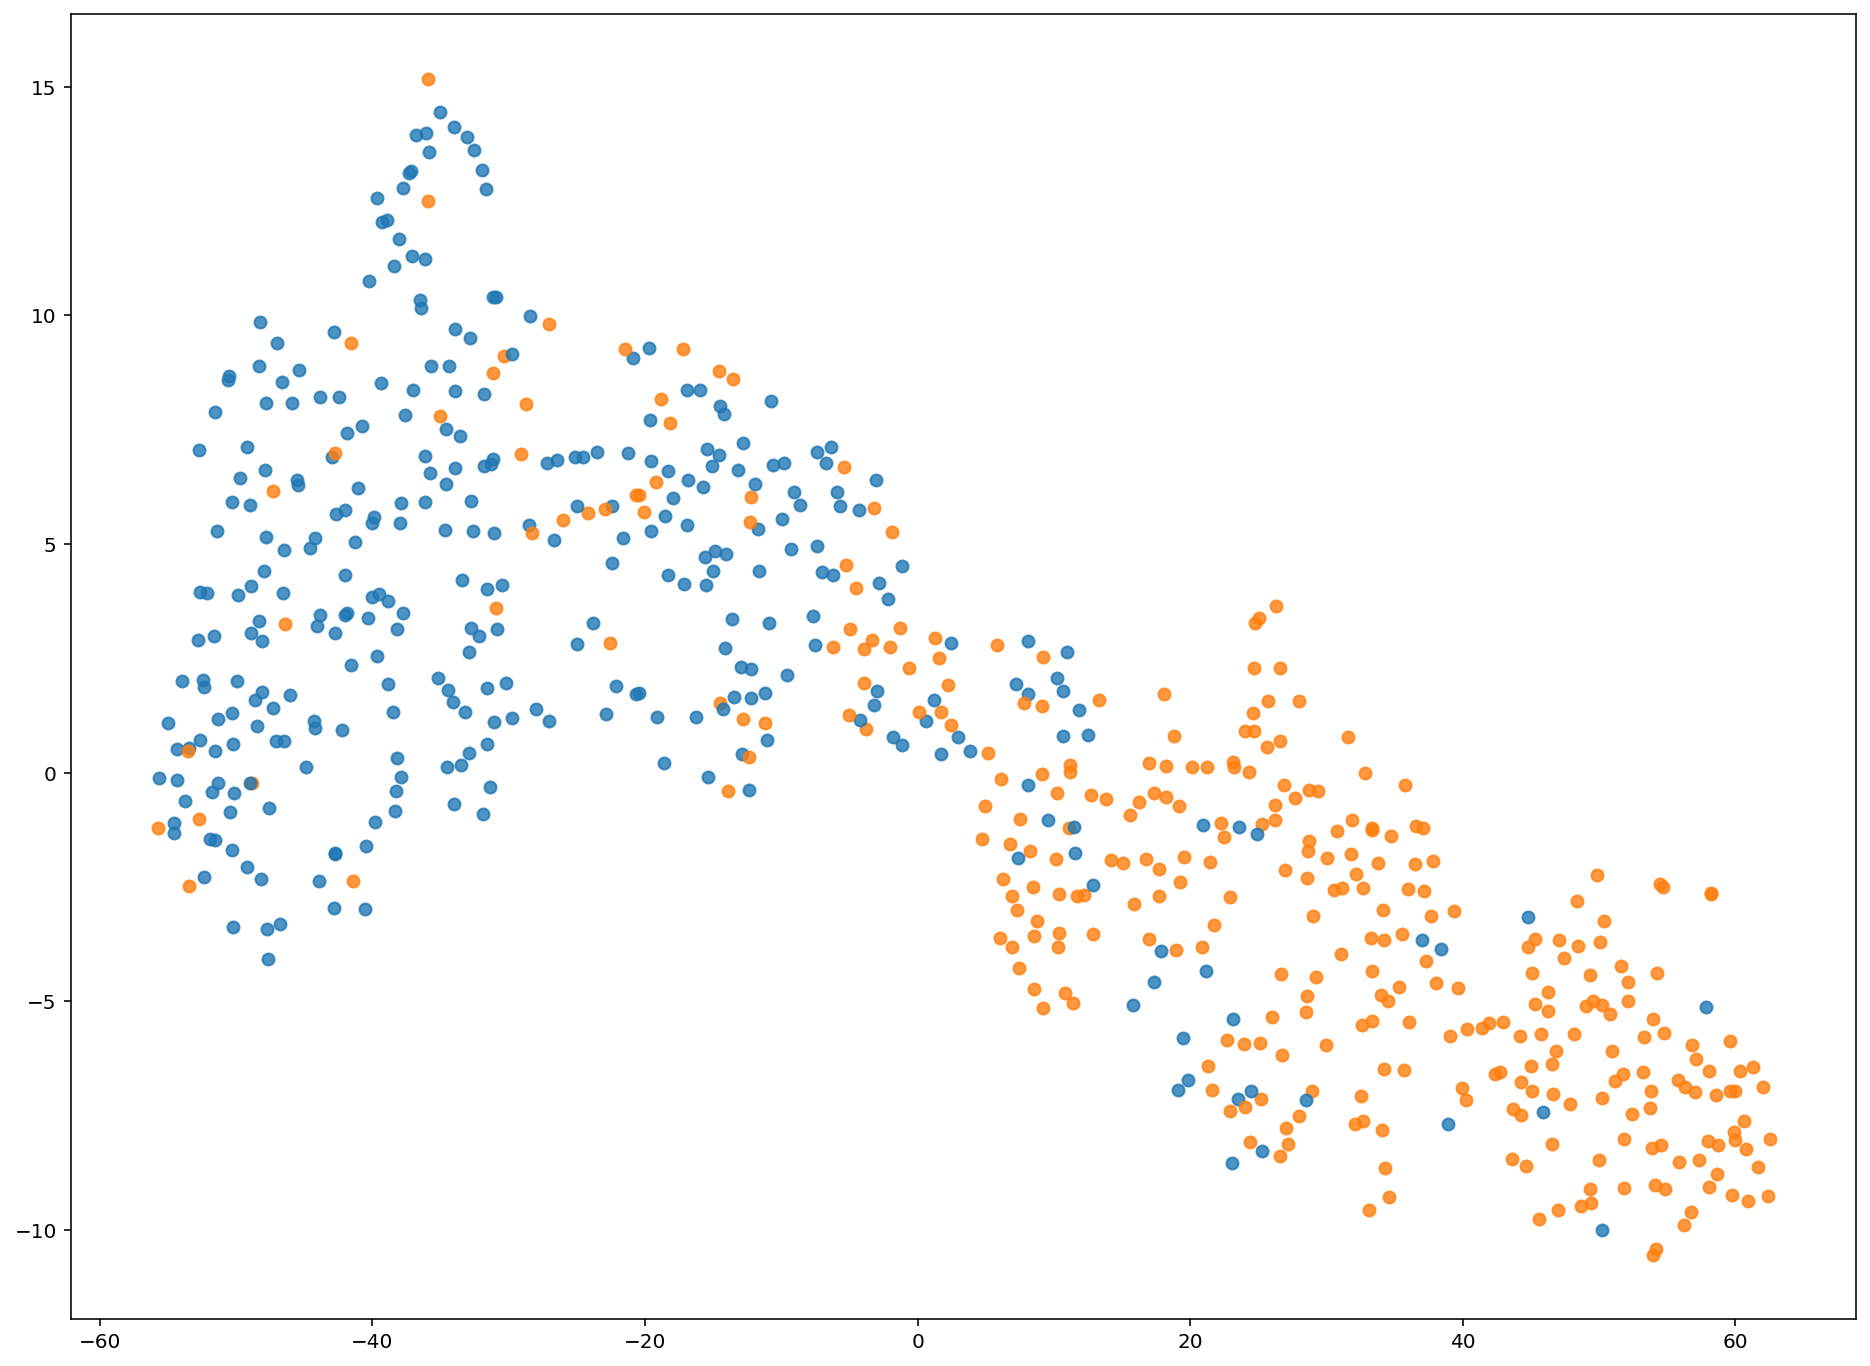

In [29]:
tsne_plot(model)
# node2vec_n=10_p=2_q=1_wl=100.cor